Fetching updates from 2022-06-22T00:00:00 to 2022-06-24T00:00:00
Fetching updates from 2022-06-24T00:00:00 to 2022-06-26T00:00:00
Fetching updates from 2022-06-26T00:00:00 to 2022-06-28T00:00:00
Fetching updates from 2022-06-28T00:00:00 to 2022-06-30T00:00:00
Fetching updates from 2022-06-30T00:00:00 to 2022-07-02T00:00:00
Fetching updates from 2022-07-02T00:00:00 to 2022-07-04T00:00:00
Fetching updates from 2022-07-04T00:00:00 to 2022-07-06T00:00:00
Fetching updates from 2022-07-06T00:00:00 to 2022-07-08T00:00:00
Fetching updates from 2022-07-08T00:00:00 to 2022-07-10T00:00:00
Fetching updates from 2022-07-10T00:00:00 to 2022-07-12T00:00:00
Fetching updates from 2022-07-12T00:00:00 to 2022-07-14T00:00:00
Fetching updates from 2022-07-14T00:00:00 to 2022-07-16T00:00:00
Fetching updates from 2022-07-16T00:00:00 to 2022-07-18T00:00:00
Fetching updates from 2022-07-18T00:00:00 to 2022-07-20T00:00:00
Fetching updates from 2022-07-20T00:00:00 to 2022-07-22T00:00:00
Fetching updates from 202

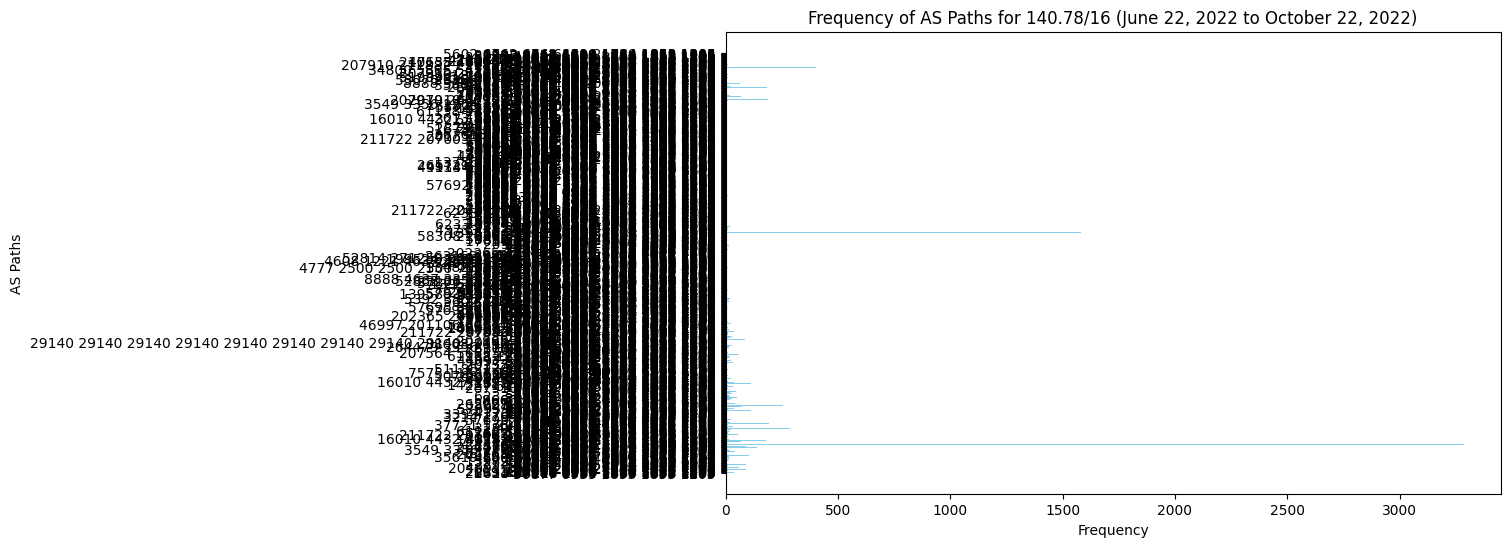

In [11]:
import requests
import datetime
import matplotlib.pyplot as plt
from collections import Counter
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the time range
start_time = datetime.datetime(2022, 6, 22)
end_time = datetime.datetime(2022, 10, 22)

# Resource of interest
resource = "AS1755"

# Initialize a list to store all updates
all_updates = []

# Divide time range into 2-day chunks and fetch updates
current_time = start_time
while current_time < end_time:
    next_time = current_time + datetime.timedelta(days=2)
    start_time_str = datetime_to_string(current_time)
    end_time_str = datetime_to_string(next_time)
    print(f"Fetching updates from {start_time_str} to {end_time_str}")
    updates = get_bgp_updates(resource, start_time_str, end_time_str)
    all_updates.extend(updates)
    current_time = next_time

# Debugging: print the raw updates data
print(f"Total updates fetched: {len(all_updates)}")

# Extract AS paths and print them as they come
as_paths = []
for update in all_updates:
    print(f"Update: {update}")
    if 'attrs' in update and 'path' in update['attrs']:
        as_path = update['attrs']['path']
        as_path_str = " ".join(map(str, as_path))
        as_paths.append(as_path_str)
        print(f"AS Path: {as_path_str}")

# Count frequency of each AS path
as_path_counter = Counter(as_paths)

# Check if there are any AS paths to plot
if as_path_counter:
    # Plot AS path frequencies
    as_path_labels, as_path_counts = zip(*as_path_counter.items())
    plt.figure(figsize=(10, 6))
    plt.barh(as_path_labels, as_path_counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('AS Paths')
    plt.title('Frequency of AS Paths for 140.78/16 (June 22, 2022 to October 22, 2022)')
    plt.show()
else:
    print("No AS paths found to plot.")


Fetching updates from 2022-06-01T00:00:00 to 2022-06-03T00:00:00
Number of updates found: 297
Fetching updates from 2022-06-03T00:00:00 to 2022-06-05T00:00:00
Number of updates found: 193
Fetching updates from 2022-06-05T00:00:00 to 2022-06-07T00:00:00
Number of updates found: 134
Fetching updates from 2022-06-07T00:00:00 to 2022-06-09T00:00:00
Number of updates found: 268
Fetching updates from 2022-06-09T00:00:00 to 2022-06-11T00:00:00
Number of updates found: 224
Fetching updates from 2022-06-11T00:00:00 to 2022-06-13T00:00:00
Number of updates found: 164
Fetching updates from 2022-06-13T00:00:00 to 2022-06-15T00:00:00
Number of updates found: 343
Fetching updates from 2022-06-15T00:00:00 to 2022-06-17T00:00:00
Number of updates found: 259
Fetching updates from 2022-06-17T00:00:00 to 2022-06-19T00:00:00
Number of updates found: 152
Fetching updates from 2022-06-19T00:00:00 to 2022-06-21T00:00:00
Number of updates found: 173
Fetching updates from 2022-06-21T00:00:00 to 2022-06-23T00:0

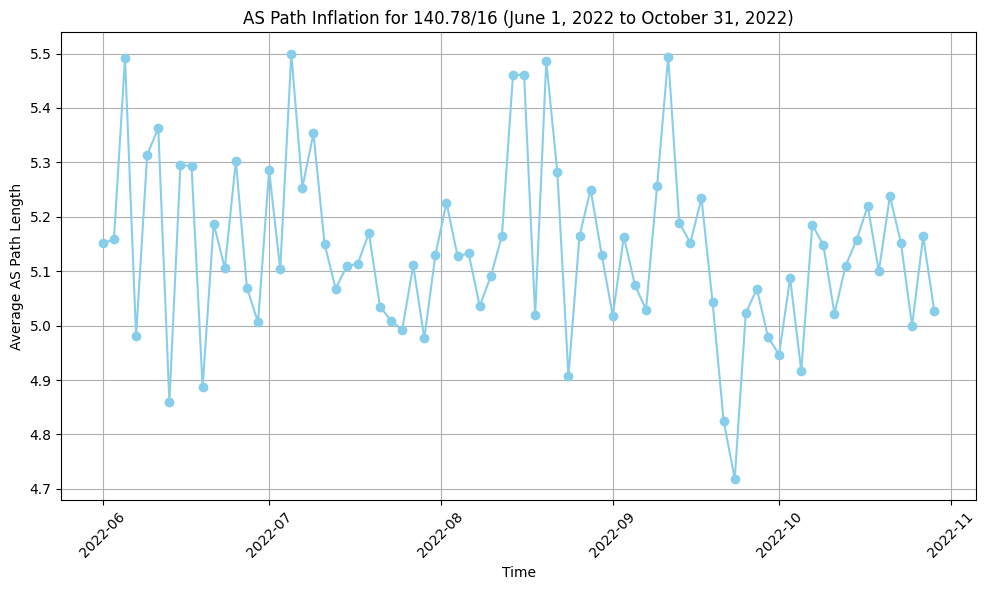

In [14]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the time range
start_time = datetime.datetime(2022, 6, 1)
end_time = datetime.datetime(2022, 10, 31)

# Resource of interest
resource = "140.78/16"

# Initialize lists to store time intervals and corresponding average AS path lengths
time_intervals = []
avg_as_path_lengths = []

# Divide time range into 2-day chunks and fetch updates
current_time = start_time
while current_time < end_time:
    next_time = current_time + datetime.timedelta(days=2)
    start_time_str = datetime_to_string(current_time)
    end_time_str = datetime_to_string(next_time)
    print(f"Fetching updates from {start_time_str} to {end_time_str}")
    updates = get_bgp_updates(resource, start_time_str, end_time_str)
    
    # Check if updates are received for the current interval
    if not updates:
        print(f"No updates found for interval: {start_time_str} to {end_time_str}")
    else:
        print(f"Number of updates found: {len(updates)}")

    # Extract AS path lengths for the current interval
    as_path_lengths = []
    for update in updates:
        if 'attrs' in update and 'path' in update['attrs']:
            as_path = update['attrs']['path']
            as_path_lengths.append(len(as_path))
    
    # Calculate and store the average AS path length for the current interval
    if as_path_lengths:
        avg_as_path_length = sum(as_path_lengths) / len(as_path_lengths)
    else:
        avg_as_path_length = 0
    time_intervals.append(current_time)
    avg_as_path_lengths.append(avg_as_path_length)
    
    current_time = next_time

# Plot AS path inflation
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('AS Path Inflation for 140.78/16 (June 1, 2022 to October 31, 2022)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fetching updates from 2020-06-01T00:00:00 to 2020-06-03T00:00:00
Number of updates found: 4273
Fetching updates from 2020-06-03T00:00:00 to 2020-06-05T00:00:00
Number of updates found: 1450
Fetching updates from 2020-06-05T00:00:00 to 2020-06-07T00:00:00
Number of updates found: 133
Fetching updates from 2020-06-07T00:00:00 to 2020-06-09T00:00:00
Number of updates found: 165
Fetching updates from 2020-06-09T00:00:00 to 2020-06-11T00:00:00
Number of updates found: 944
Fetching updates from 2020-06-11T00:00:00 to 2020-06-13T00:00:00
Number of updates found: 139
Fetching updates from 2020-06-13T00:00:00 to 2020-06-15T00:00:00
Number of updates found: 84
Fetching updates from 2020-06-15T00:00:00 to 2020-06-17T00:00:00
Number of updates found: 1993
Fetching updates from 2020-06-17T00:00:00 to 2020-06-19T00:00:00
Number of updates found: 192
Fetching updates from 2020-06-19T00:00:00 to 2020-06-21T00:00:00
Number of updates found: 139
Fetching updates from 2020-06-21T00:00:00 to 2020-06-23T00

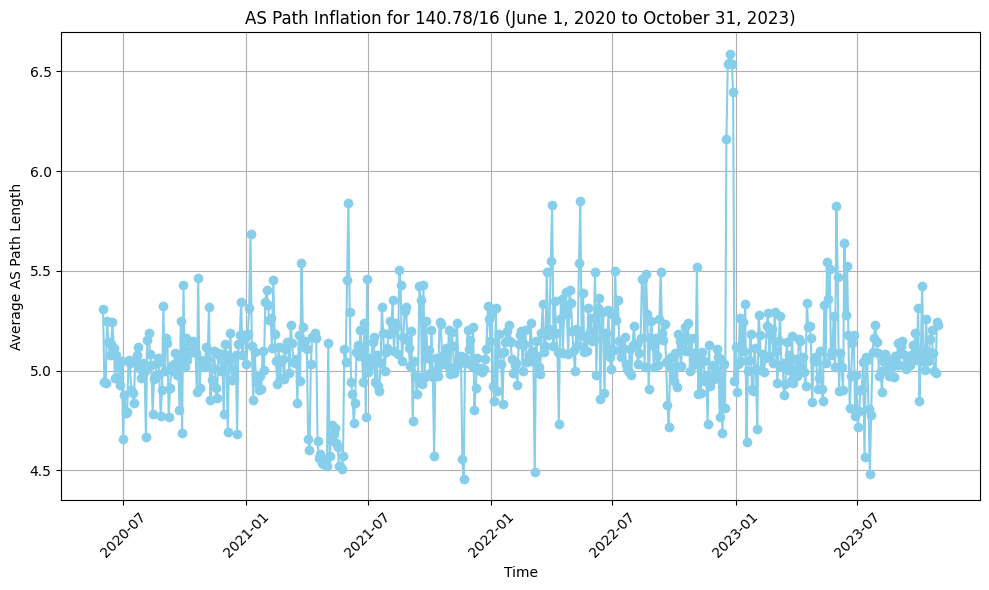

In [15]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the time range
start_time = datetime.datetime(2020, 6, 1)
end_time = datetime.datetime(2023, 10, 31)

# Resource of interest
resource = "140.78/16"

# Initialize lists to store time intervals and corresponding average AS path lengths
time_intervals = []
avg_as_path_lengths = []

# Divide time range into 2-day chunks and fetch updates
current_time = start_time
while current_time < end_time:
    next_time = current_time + datetime.timedelta(days=2)
    start_time_str = datetime_to_string(current_time)
    end_time_str = datetime_to_string(next_time)
    print(f"Fetching updates from {start_time_str} to {end_time_str}")
    updates = get_bgp_updates(resource, start_time_str, end_time_str)
    
    # Check if updates are received for the current interval
    if not updates:
        print(f"No updates found for interval: {start_time_str} to {end_time_str}")
    else:
        print(f"Number of updates found: {len(updates)}")

    # Extract AS path lengths for the current interval
    as_path_lengths = []
    for update in updates:
        if 'attrs' in update and 'path' in update['attrs']:
            as_path = update['attrs']['path']
            as_path_lengths.append(len(as_path))
    
    # Calculate and store the average AS path length for the current interval
    if as_path_lengths:
        avg_as_path_length = sum(as_path_lengths) / len(as_path_lengths)
    else:
        avg_as_path_length = 0
    time_intervals.append(current_time)
    avg_as_path_lengths.append(avg_as_path_length)
    
    current_time = next_time

# Plot AS path inflation
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('AS Path Inflation for 140.78/16 (June 1, 2020 to October 31, 2023)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
